## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

## Loading the data

In [3]:
df = pd.read_csv('wine-quality-white-and-red.csv')


In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Data Analysis and Visualization

D:\SoftwaresInstalled\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


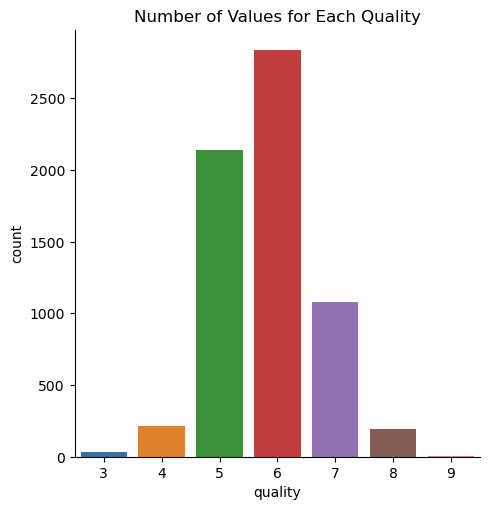

In [7]:
# Number of values for each quality:

sns.catplot(x='quality', data=df, kind='count')
plt.title('Number of Values for Each Quality')
plt.show()


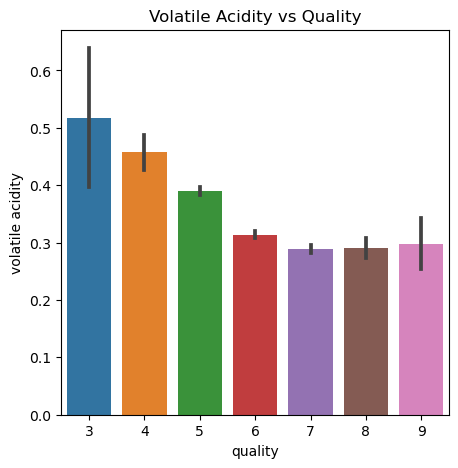

In [8]:
# Volatile Acidity vs Quality:

plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity vs Quality')
plt.show()

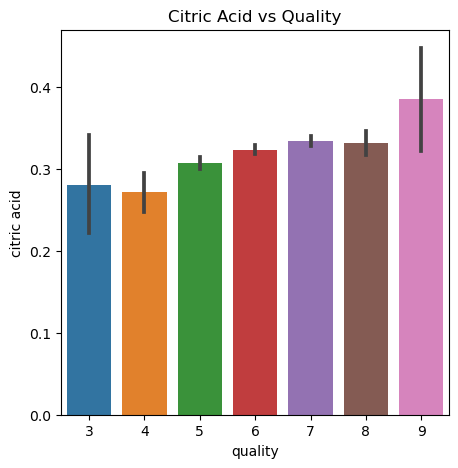

In [9]:
# Citric Acid vs Quality:

plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)
plt.title('Citric Acid vs Quality')
plt.show()

## Data preprocessing

In [10]:
# Check for missing values
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

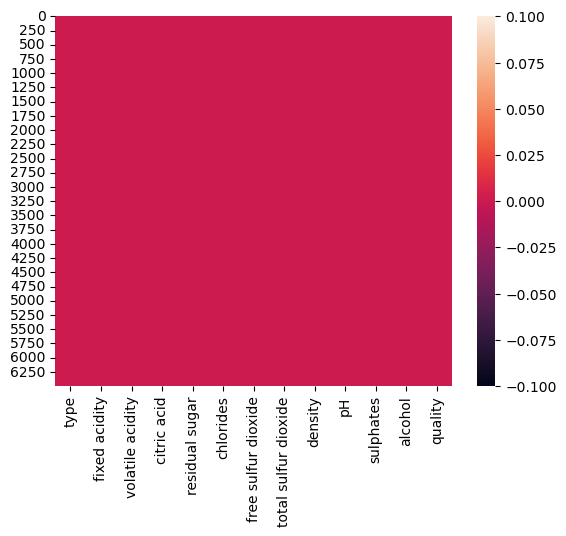

In [11]:
import seaborn as sns 
sns.heatmap(df.isnull())
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])


In [13]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


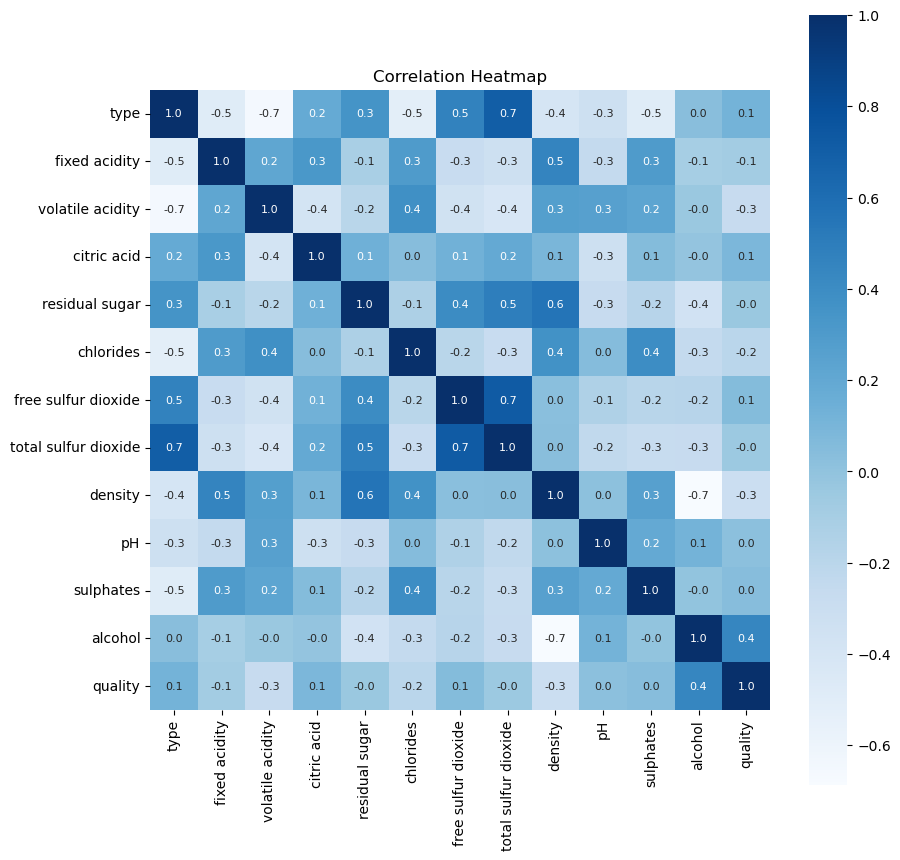

In [15]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


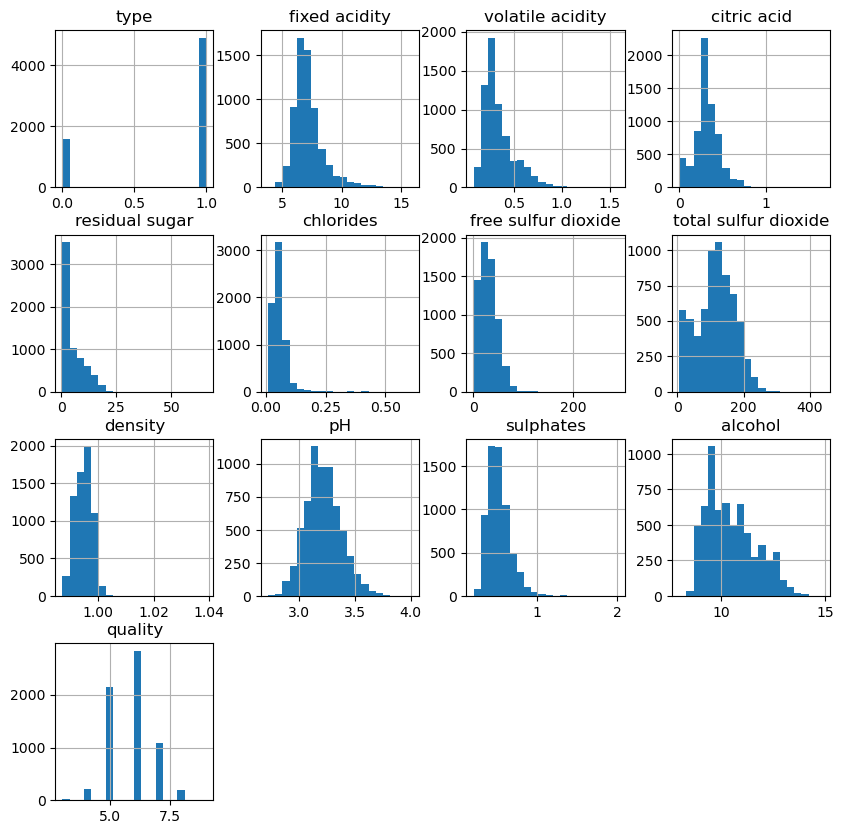

In [16]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [17]:
X = df.drop('quality', axis=1)
Y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

## Train-Test Split:

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', Y_test.shape)

Shape of X_train =  (5197, 12)
Shape of y_train =  (5197,)
Shape of X_test =  (1300, 12)
Shape of y_test =  (1300,)


In [19]:
df.dtypes

type                      int32
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [33]:
def evaluate_model(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)

    
    return accuracy, conf_matrix

In [21]:
# Dictionary to store accuracies and confusion matrices
accuracies = {}
# conf_matrices = {}

## Logistic Regression:

In [34]:
print("Logistic Regression")
lr_model = LogisticRegression(max_iter=5000)
accuracies['Logistic Regression'] = evaluate_model(lr_model, X_train, X_test, Y_train, Y_test)

Logistic Regression
Accuracy: 0.8123
Confusion Matrix:
[[996  33]
 [211  60]]


## K-Nearest Neighbors

In [23]:
print("K-Nearest Neighbors")
knn_model = KNeighborsClassifier()
accuracies['K-Nearest Neighbors'] = evaluate_model(knn_model, X_train, X_test, Y_train, Y_test)

K-Nearest Neighbors
Accuracy: 0.7938
Confusion Matrix:
[[941  88]
 [180  91]]


## Decision Tree:

In [24]:
print("Decision Tree")
dt_model = DecisionTreeClassifier(random_state=70)
accuracies['K-Nearest Neighbors'] = evaluate_model(dt_model, X_train, X_test, Y_train, Y_test)

Decision Tree
Accuracy: 0.8362
Confusion Matrix:
[[921 108]
 [105 166]]


## Random Forest:

In [25]:
print("Random Forest")
rf_model = RandomForestClassifier(n_estimators=200, random_state=50)
accuracies['Random Forest'] = evaluate_model(rf_model, X_train, X_test, Y_train, Y_test)

Random Forest
Accuracy: 0.8785
Confusion Matrix:
[[988  41]
 [117 154]]


## Support Vector Machine:

In [26]:
print("Support Vector Machine")
svm_model = SVC(kernel='linear', random_state=4)
accuracies['Support Vector Machine'] = evaluate_model(svm_model, X_train, X_test, Y_train, Y_test)

Support Vector Machine
Accuracy: 0.7915
Confusion Matrix:
[[1029    0]
 [ 271    0]]


D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\SoftwaresInstalled\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [27]:
print("Gradient Boosting")
gb_model = GradientBoostingClassifier(random_state=4)
accuracies['Gradient Boosting']= evaluate_model(gb_model, X_train, X_test, Y_train, Y_test)

Gradient Boosting
Accuracy: 0.8315
Confusion Matrix:
[[978  51]
 [168 103]]


## all accuracies

In [28]:
print("\nModel Accuracies:")
for model_name, (accuracy, _) in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")


Model Accuracies:
Logistic Regression: 0.8123
K-Nearest Neighbors: 0.8362
Random Forest: 0.8785
Support Vector Machine: 0.7915
Gradient Boosting: 0.8315


## Plotting accuracies

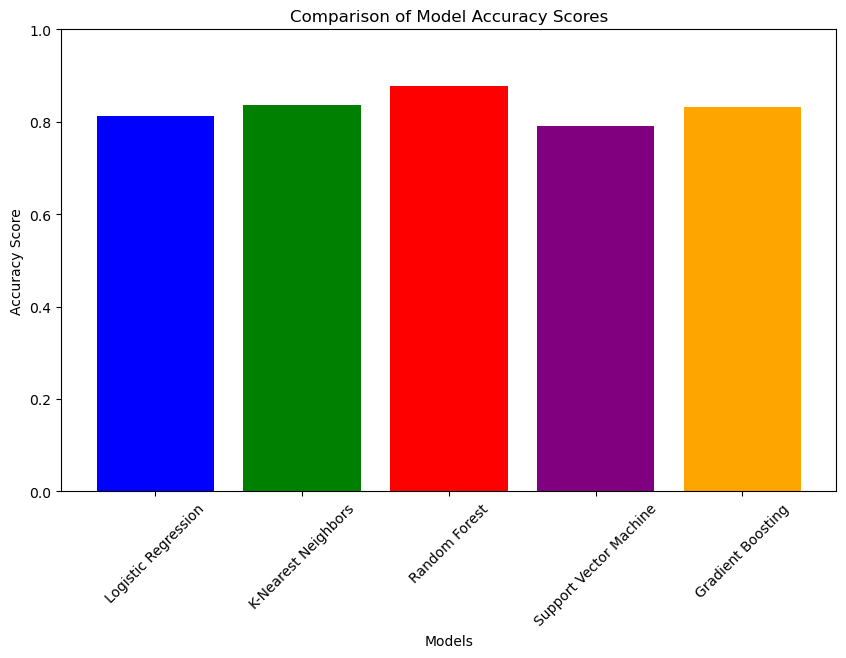

In [29]:
# Accuracy scores of the models
accuracy_scores = [accuracy for accuracy, _ in accuracies.values()]

# Labels for the models
model_labels = list(accuracies.keys())

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_labels, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Conclusion

In [33]:
Based on our analysis, the Random Forest model demonstrated the highest accuracy in predicting wine quality, 
outperforming Logistic Regression, K-Nearest Neighbors, Support Vector Machine, and Gradient Boosting. 
Therefore, we conclude that Random Forest is the most suitable algorithm for our wine quality prediction task, 
providing a balance of high accuracy and robustness.